# Google Play Store Apps

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('googleplaystore.csv')

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#### Features Available

* **App**: The official name of the App.
* **Category**: Category the app belongs to.
* **Rating**: Overall user rating of the app.
* **Reviews**: Number of user reviews for the app.
* **Size**: Size of the app.
* **Installs**: Number of user downloads/installs for the app.
* **Type**: Paid or Free.
* **Price**: Price of the app.
* **Content Rating**: Age group the app is targeted at - Children / Mature 21+ / Adult.
* **Genres**: An app can belong to multiple genres (apart from its main category).
* **Last Updated**: Date when the app was last updated on Play Store.
* **Current Version**: Current version of the app available on Play Store
* **Android Ver**: Min required Android version.

### Data Cleaning and Preprocessing

#### Column: Size

Replacing k and M with their values to convert values to numeric.

In [4]:
df['Size'] = df['Size'].str.replace('K', 'e+3')
df['Size'] = df['Size'].str.replace('k', 'e+3')
df['Size'] = df['Size'].str.replace('M', 'e+6')
df['Size'].head()

0     19e+6
1     14e+6
2    8.7e+6
3     25e+6
4    2.8e+6
Name: Size, dtype: object

Now we have two types of values in our **Size** data:
* exponential values (not yet converted to string)
* Strings (that cannot be converted into numeric)

In [5]:
#convert into numeric
def is_convertable(v):
    try:
        float(v)
        return True
    except ValueError:
        return False

temp = df['Size'].apply(lambda x: is_convertable(x))
temp.head()

0    True
1    True
2    True
3    True
4    True
Name: Size, dtype: bool

Now checking unique non numeric values in Size.

In [6]:
df['Size'][~temp].value_counts().head()

Varies with device    1695
1,000+                   1
Name: Size, dtype: int64

* Replacing 'Varies with Device' by nan.
* Converting 1,000+ to 1000, to make it numeric.

In [7]:
df['Size'] = df['Size'].replace('Varies with device', np.nan)
df['Size'] = df['Size'].replace('1,000+', 1000) 

Converting the cleaned Size data to numeric type.

In [8]:
df['Size'] = pd.to_numeric(df['Size'])

#### Installs

Checking values of Installs

In [9]:
df['Size'].value_counts().head()

11000000.0    198
12000000.0    196
14000000.0    194
13000000.0    191
15000000.0    184
Name: Size, dtype: int64

Removing '+' and ',' and convert into numeric type.

In [10]:
df['Installs'] = df['Installs'].apply(lambda x: x.strip('+'))
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', ''))
df['Installs'] = df['Installs'].replace('Free', np.nan)
df['Installs'].value_counts()

1000000       1579
10000000      1252
100000        1169
10000         1054
1000           907
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: Installs, dtype: int64

In [11]:
df['Installs'] = pd.to_numeric(df['Installs'])

#### Review

In [12]:
df[~df.Reviews.str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,1000.0,NaN,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


 It can be noticed that the entries are entered wrong. We could fix it by setting Category as nan and shifting all the values, but deleting the sample for now.

In [13]:
df.drop(df.index[10472], inplace = True)


#### Rating

For entries to be right, we need to make sure they fall within the range 1 to 5.

In [14]:
print('Range: ', df['Rating'].min(), '-', df['Rating'].max())

Range:  1.0 - 5.0


In [15]:
df['Rating'].dtype

dtype('float64')

Data is already numeric, now checking if the data has null values.

In [16]:
print(df['Rating'].isna().sum(), 'null values out of',len(df['Rating']))

1474 null values out of 10840


#### Type

Checking for unique values.

In [17]:
df['Type'].value_counts()

Free    10039
Paid      800
Name: Type, dtype: int64

There are only two types, free and paid. No unwanted data here.

#### Price

Checking for number of unique values.

In [18]:
df['Price'].nunique()

92

Remove '$' and convert data into numeric type. 

In [19]:
df['Price'] = df['Price'].apply(lambda x: x.strip('$'))


In [20]:
df['Price']= pd.to_numeric(df['Price'])

#### Category

Unique Categories

In [21]:
df.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

### Content Rating

Checking for unique terms in Content rating.

In [22]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

#### Genres

Checking unique values

In [23]:
df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

The data is in the format Category;Subcategory. Lets divide the data into two columns, one as primary category and the other as secondary, using ; as separator.

In [24]:
sep = ';'
rest = df['Genres'].apply(lambda x: x.split(sep)[0])


df['Pri_Genres'] = rest

df['Pri_Genres'].head()

0    Art & Design
1    Art & Design
2    Art & Design
3    Art & Design
4    Art & Design
Name: Pri_Genres, dtype: object

In [25]:
rest = df['Genres'].apply(lambda x: x.split(sep)[-1])
rest.unique()

df['Sec_Genres'] = rest
df['Sec_Genres'].head()

0    Art & Design
1    Pretend Play
2    Art & Design
3    Art & Design
4      Creativity
Name: Sec_Genres, dtype: object

In [26]:
grouped = df.groupby(['Pri_Genres','Sec_Genres'])
grouped.size().head(15)

Pri_Genres       Sec_Genres        
Action           Action                365
                 Action & Adventure     17
Adventure        Action & Adventure     13
                 Adventure              75
                 Brain Games             1
                 Education               2
Arcade           Action & Adventure     16
                 Arcade                220
                 Pretend Play            1
Art & Design     Action & Adventure      2
                 Art & Design           58
                 Creativity              7
                 Pretend Play            2
Auto & Vehicles  Auto & Vehicles        85
Beauty           Beauty                 53
dtype: int64

Generating a two table to better understand the relationship between primary and secondary categories of Genres

In [27]:
twowaytable = pd.crosstab(index=df["Pri_Genres"],columns=df["Sec_Genres"])
twowaytable.head()

Sec_Genres,Action,Action & Adventure,Adventure,Arcade,Art & Design,Auto & Vehicles,Beauty,Board,Books & Reference,Brain Games,...,Simulation,Social,Sports,Strategy,Tools,Travel & Local,Trivia,Video Players & Editors,Weather,Word
Pri_Genres,,,,,,,,,,,,,,,,,,,,,
Action,365,17,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Adventure,0,13,75,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Arcade,0,16,0,220,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Art & Design,0,2,0,0,58,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Auto & Vehicles,0,0,0,0,0,85,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


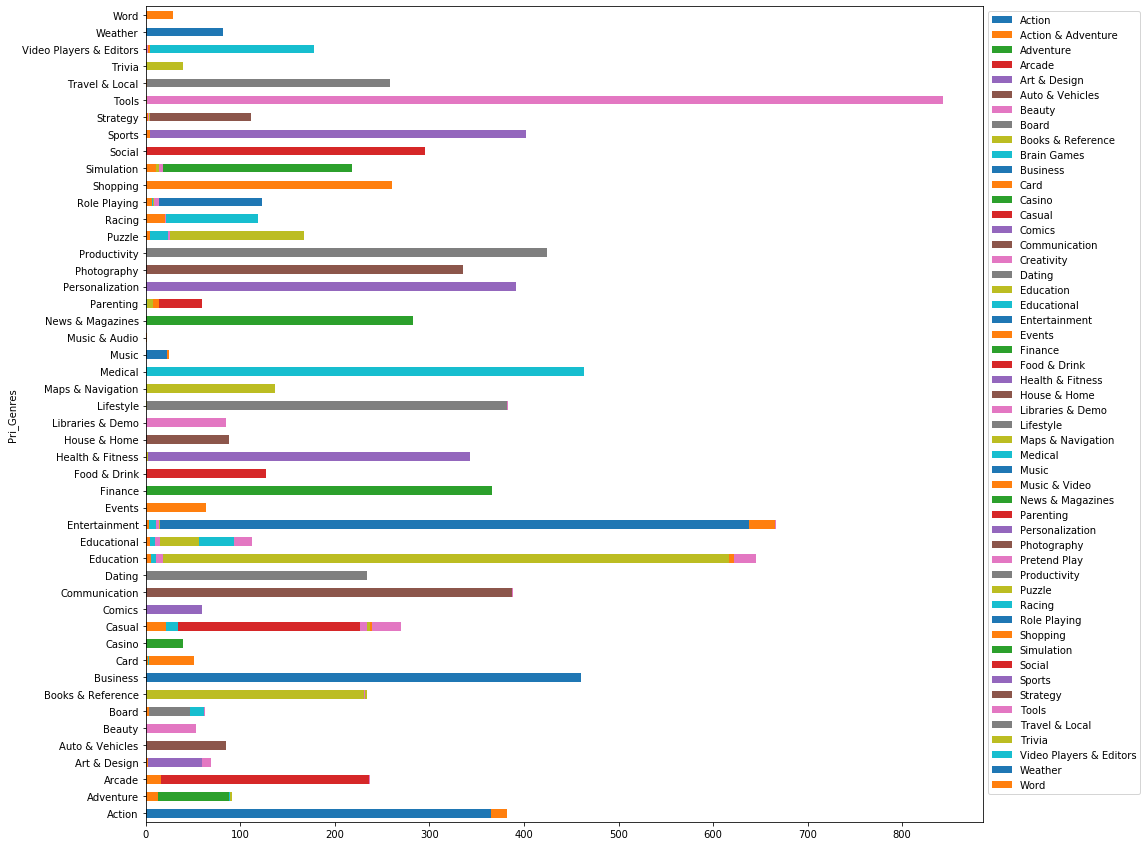

In [28]:
twowaytable.plot(kind="barh", figsize=(15,15),stacked=True);
plt.legend(bbox_to_anchor=(1.0,1.0))

#### Last Updated

In [29]:
df['Last Updated'].head()

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last Updated, dtype: object

Converting string to datetime.

In [30]:
from datetime import datetime,date
temp=pd.to_datetime(df['Last Updated'])
temp.head()

0   2018-01-07
1   2018-01-15
2   2018-08-01
3   2018-06-08
4   2018-06-20
Name: Last Updated, dtype: datetime64[ns]

Taking a difference between last updated date and today to simplify the data for future processing. It gives days.

In [31]:
df['Last_Updated_Days'] = temp.apply(lambda x:date.today()-datetime.date(x))
df.Last_Updated_Days.head()

0   877 days
1   869 days
2   671 days
3   725 days
4   713 days
Name: Last_Updated_Days, dtype: timedelta64[ns]

#### Android Version

In [32]:
df['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

Most of the values have a upper value and a lower value (i.e. a range), lets divide them as two new features Version begin and end, which might come handy while processing data furthur

In [33]:
df['Version_begin']=df['Android Ver'].apply(lambda x:str(x).split(' and ')[0].split(' - ')[0])
df.Version_begin=df.Version_begin.replace('4.4W','4.4')
df['Version_end']=df['Android Ver'].apply(lambda x:str(x).split(' and ')[-1].split(' - ')[-1])

#### Current Version

In [34]:
df['Current Ver'].value_counts().head()

Varies with device    1459
1.0                    809
1.1                    264
1.2                    178
2.0                    151
Name: Current Ver, dtype: int64

In [35]:
df['Current Ver'].isna().sum()

8

As we have only 8 nans lets replace them with Varies with data to simplify

In [36]:
import re
temp=df['Current Ver'].replace(np.nan,'Varies with device')
temp=temp.apply(lambda x: 'Varies with device' if x=='Varies with device'  else  re.findall('^[0-9]\.[0-9]|[\d]|\W*',str(x))[0] )